# HIV Model
Adi Sudhakar

In [6]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [7]:
state = State(
    R=1000, # activated normal lymphocytes
    L=0, # latently infected
    E=0, # actively infected
    V=4e-7 # free virions

)

,values
R,1.000000e+03
L,0.000000e+00
E,0.000000e+00
V,4.000000e-07


In [8]:
system = System(
    gamma=1.36,   # birthrate of R
    mu=1.36e-3,   # natural deathrate of R and L
    delta=0.33,   # deathrate of E
    beta=0.00027, # R-to-L conversion rate (per virion)
    alpha=3.6e-2, # L-to-E rate
    pie=100,      # virion creation rate
    sigma=2,      # virion death rate
    rho=0.1,      # proportion of cells becoming latently infected upon infection
    tau=0.2       # proportion of cells activated
)

,values
gamma,1.36000
mu,0.00136
delta,0.33000
beta,0.00027
alpha,0.03600
pie,100.00000
sigma,2.00000
rho,0.10000
tau,0.20000


In [24]:
def update_func(state, t, system):
    # suggestion from Allison: first calculate named flows here to guarantee conservation
    unpack(system)
    
    dt = 0.1
    dR = gamma * tau - mu * state.R - beta * state.R * state.V
    dL = rho * beta * state.R * state.V - mu * state.L - alpha * state.L
    dE = (1 - rho) * beta * state.R * state.V + alpha * state.L - delta * state.E
    dV = pie * state.E - sigma * state.V
   
    state.R +=dR *dt
    state.L +=dL *dt
    state.E +=dE *dt
    state.V +=dV *dt
    
    return state
    
#state = update_func(state, system)

In [25]:
t0 = 0
t_end = 120

def run_simulation(system, update_func):
    
    unpack(system)
    
    frame = TimeFrame(columns=state.index)
    frame.row[t0] = state
    
    for t in linrange(t0, t_end):
        frame.row[t+1] = update_func(frame.row[t], t, system)
        
    return frame

In [26]:
results = run_simulation(system, update_func)

,R,L,E,V
0,1000.000000,0.000000e+00,0.000000e+00,4.000000e-07
1,999.891200,1.080000e-09,9.720000e-09,3.200000e-07
2,999.782415,1.939871e-09,1.717828e-08,3.532000e-07
3,999.673644,2.886056e-09,2.519927e-08,4.543428e-07
4,999.564889,4.101599e-09,3.541502e-08,6.154670e-07
5,999.456148,5.747314e-09,4.921043e-08,8.465238e-07
6,999.347422,8.010213e-09,6.816651e-08,1.169323e-06
7,999.238711,1.113540e-08,9.434187e-08,1.617124e-06
8,999.130014,1.545671e-08,1.305349e-07,2.237118e-06
9,999.021332,2.143392e-08,1.805975e-07,3.095043e-06


In [27]:
def plot_results(R, L, E, V):

    plot(R, '--', label='R')
    plot(L, '-', label='L')
    plot(E, ':', label='E')
    plot(V, '*', label='V')
    decorate(xlabel='Time (days)',
             ylabel='population')

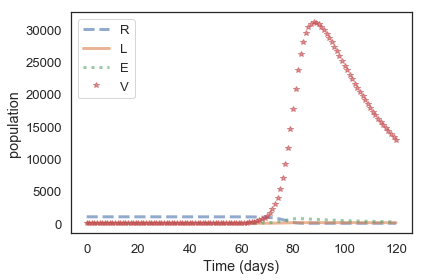

In [28]:
plot_results(results.R, results.L, results.E, results.V)

^I know that this isnt the correct graph for the model, but I havent been able to work at max capacity the last few days b/c I hit my head - getting this checked out on 10/25... I'll re-submit a fixed copy when I'm feeling a bit better. Thanks